In [62]:
from tkinter import *
import tkinter.messagebox
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_datasets as tfds 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
imdb, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

In [3]:
train_data, test_data = imdb['train'], imdb['test']
train_sentenses = []
train_labels = []
test_sentenses = []
test_labels = []
for s,l in train_data:
    train_sentenses.append(str(s.numpy()))
    train_labels.append(l.numpy())
for s,l in test_data:
    test_sentenses.append(str(s.numpy()))
    test_labels.append(l.numpy())

In [4]:
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(train_sentenses)
word_index = tokenizer.word_index

train_seq = tokenizer.texts_to_sequences(train_sentenses)
pad_train = pad_sequences(train_seq, maxlen=120, truncating='post')

test_seq = tokenizer.texts_to_sequences(test_sentenses)
pad_test = pad_sequences(test_seq, maxlen=120, truncating='post')

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 64, input_length=120), 
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [27]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 120, 64)           640000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 120, 128)          66048     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 751,489
Trainable params: 751,489
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
history = model.fit(pad_train, np.array(train_labels), epochs=10,
          validation_data=(pad_test, np.array(test_labels)), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 - 116s - loss: 0.4575 - accuracy: 0.7750 - val_loss: 0.3894 - val_accuracy: 0.8245
Epoch 2/10
25000/25000 - 111s - loss: 0.2832 - accuracy: 0.8852 - val_loss: 0.4217 - val_accuracy: 0.8148
Epoch 3/10
25000/25000 - 111s - loss: 0.1903 - accuracy: 0.9264 - val_loss: 0.4600 - val_accuracy: 0.8162
Epoch 4/10
25000/25000 - 111s - loss: 0.1143 - accuracy: 0.9589 - val_loss: 0.6177 - val_accuracy: 0.7862
Epoch 5/10
25000/25000 - 110s - loss: 0.0663 - accuracy: 0.9770 - val_loss: 0.7312 - val_accuracy: 0.7935
Epoch 6/10
25000/25000 - 105s - loss: 0.0490 - accuracy: 0.9825 - val_loss: 0.8290 - val_accuracy: 0.7960
Epoch 7/10
25000/25000 - 108s - loss: 0.0282 - accuracy: 0.9908 - val_loss: 0.9911 - val_accuracy: 0.8015
Epoch 8/10
25000/25000 - 103s - loss: 0.0224 - accuracy: 0.9924 - val_loss: 1.0940 - val_accuracy: 0.7920
Epoch 9/10
25000/25000 - 101s - loss: 0.0180 - accuracy: 0.9945 - val_loss: 1.0993 - val_accuracy: 0.7

In [30]:
# visualizing Embeddings
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

reversed_word_index = dict([(v, k) for k, v in word_index.items()])

(10000, 64)


In [12]:
out_v = open('vecs.tsv', 'w', encoding='utf-8')
out_m = open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, 10000):
    word = reversed_word_index[word_num]
    embeddings = weights[word_num]
    out_m.write(word + '\n')
    out_v.write('/t'.join([str(x) for x in embeddings]) + '\n')
out_v.close()
out_m.close()

In [31]:
def plot_graph(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_' + string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_' + string])
    plt.show()

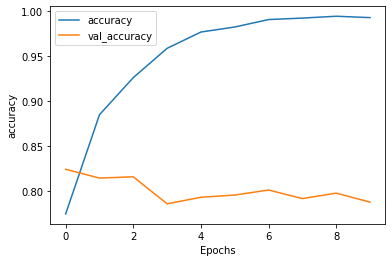

In [32]:
plot_graph(history, "accuracy")

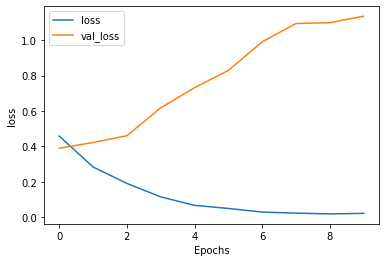

In [33]:
plot_graph(history, "loss")

In [44]:
def predict_review(review):
    rev_seq = tokenizer.texts_to_sequences(review)
    pad_rev = pad_sequences(rev_seq, maxlen=120, truncating='post')
    return model.predict(pad_rev)

In [47]:
def run_gui():
    

array([[0.07938261]], dtype=float32)

In [94]:
class ReviewClassifier(object):
    def __init__(self):

        self.root = Tk()
        self.root.title("IMDB REVIEW CLASSIFIER")
        self.root.config(background='black')
        self.root.maxsize(600, 400)
        self.root.minsize(600, 400)
        self.menu_bar = Menu(self.root)
        self.file_menu = Menu(self.menu_bar, tearoff=0)
        self.file_menu.add_command(label="New", command=ReviewClassifier)
        self.file_menu.add_separator()
        self.file_menu.add_command(label="Exit", command=self.root.destroy)
        self.menu_bar.add_cascade(label="File", menu=self.file_menu)
        self.help_menu = Menu(self.menu_bar, tearoff=0)
        self.help_menu.add_command(label="About", command=self.about)
        self.menu_bar.add_cascade(label="Help", menu=self.help_menu)
        self.root.config(menu=self.menu_bar)

        self.welcome_label_1 = Label(self.root, fg="dark red", text="Welcome to", bg='black')
        self.welcome_label_1.config(font=("Courier", 44))
        self.welcome_label_1.pack(padx=5, pady=5)
        self.welcome_label_2 = Label(self.root, fg="black", text="IMDB REVIWER", bg='orange')
        self.welcome_label_2.config(font=("Courier", 44))
        self.welcome_label_2.pack(padx=5, pady=5)
        
        self.review = Entry(self.root, width=70)
        self.review.pack(pady=5)
        self.classify = Button(self.root, text="Classify", relief="flat", bg='dark green', fg='white'
                                , width=50, height=5, command=self.get_review)
        self.classify.pack(pady=5)
        self.status_lbl = Label(self.root, text="Status: Null", fg="blue", bg='black')
        self.status_lbl.config(font=("Courier", 30))
        self.status_lbl.pack()
        self.root.mainloop()

    @staticmethod
    def about():
        tkinter.messagebox.showinfo("About", "I have been created by Essam Mohamed")

    def get_review(self):
        review = self.review.get()
        prediction = predict_review([review])
        print(prediction)
        if prediction[0] > 0.5:
            self.status_lbl.config(text="Status: Positive REVIEW", fg='dark green')
        else:
            self.status_lbl.config(text="Status: Negative REVIEW", fg='dark red')


In [95]:
ReviewClassifier()

[[0.88076794]]
[[0.4182045]]
[[0.06150676]]
[[0.06150676]]
[[0.00019468]]
[[0.8544752]]
[[0.00139868]]
